In [ ]:
#AHAMED RAZI
#25MML0058
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In [ ]:
# Load pretrained MobileNetV2
model = MobileNetV2(weights='imagenet')

In [ ]:
import cv2
import numpy as np

def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Handle videos where frame count is 0
    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # 🔴 Important fix
            frames.append(frame)

        count += 1

        if len(frames) >= max_frames:
            break

    cap.release()

    print("Extracted frames:", len(frames))
    return np.array(frames)


#Extracting only a limited number of frames greatly reduces computation time.
#Uniform frame sampling still captures most scene information for classification tasks.


In [ ]:
def classify_video(video_path):
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return

    print("Shape of frames array:", frames.shape)

    frames = preprocess_input(frames)
    predictions = model.predict(frames)

    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)
    #top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=1)

    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    for pred in top_pred[0]:
      print(pred[1], ":", round(pred[2]*100, 2), "%")


    print("Final Prediction:", top_pred[0][0][1])

    print("Pixel values for the first frame:")
    print(frames[0])

    # [frame_index, row_range, col_range, channel_index]
    pixel_slice = frames[0, 0:5, 0:5, 0]
    print("Top-left 5x5 matrix of Red channel pixels:")
    print(pixel_slice)


#Averaging predictions across frames improves stability compared to single-frame prediction.
#Shape inspection helps debug preprocessing errors quickly.


In [ ]:
# Replace with your video path
video_path = "/content/327101_small.mp4"
classify_video(video_path)




Extracted frames: 20
Shape of frames array: (20, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
ptarmigan : 10.38 %
black_grouse : 9.76 %
weasel : 5.96 %
ski : 3.89 %
stone_wall : 3.65 %
Final Prediction: ptarmigan
Pixel values for the first frame:
[[[ 0.6784314   0.8117647   0.8901961 ]
  [ 0.6784314   0.8117647   0.8901961 ]
  [ 0.6784314   0.8117647   0.8901961 ]
  ...
  [ 0.7647059   0.84313726  0.8980392 ]
  [ 0.7647059   0.84313726  0.8980392 ]
  [ 0.7647059   0.84313726  0.8980392 ]]

 [[ 0.6784314   0.8117647   0.8901961 ]
  [ 0.6784314   0.8117647   0.8901961 ]
  [ 0.6784314   0.8117647   0.8901961 ]
  ...
  [ 0.7647059   0.84313726  0.8980392 ]
  [ 0.7647059   0.84313726  0.8980392 ]
  [ 0.7647059   0.84313726  0.8980392 ]]

 [[ 0.6784314   0.8117647   0.8901961 ]
  [ 0.6784314   0.8117647   0.8901961 ]
  [ 0.6784314   0.8117647   0.8901961 ]
  ...
  [ 0.7647059   0.84313726  0.8980392 ]
  [ 0.7647059   0.84313726  0.8980392 ]
  [ 0.7647059   0.84313726  0.8980392 ]]

 ...


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pretrained MobileNetV2
model = MobileNetV2(weights='imagenet')

def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            # Convert BGR (OpenCV default) to RGB (Matplotlib/TF default)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)

        count += 1
        if len(frames) >= max_frames:
            break

    cap.release()
    print(f"Extracted {len(frames)} frames.")
    return np.array(frames)

#Visualization of intermediate data helps understand model behavior.



In [ ]:
def classify_video(video_path):
    # 1. Extract Frames
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return

    # 2. Inspect Every Frame (Visual + Pixel Data)
    print("\n--- Visualizing Frames and Pixel Matrices ---")
    for i, frame in enumerate(frames):
        print(f"\n[FRAME {i}] Shape: {frame.shape}")
        # Display the top-left 8x8 pixel matrix of the Red channel
        print(f"Top-Left 8x8 Pixel Matrix (Red Channel):\n{frame[0:8, 0:8, 0]}")

        plt.figure(figsize=(3, 3))
        plt.imshow(frame)
        plt.title(f"Frame {i}")
        plt.axis('off')
        plt.show()

    # 3. Preprocess and Predict
    # We use .astype('float32') to ensure preprocess_input works correctly
    processed_frames = preprocess_input(frames.astype('float32'))
    predictions = model.predict(processed_frames)

    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)
    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    print("\n--- Final Predictions ---")
    for pred in top_pred[0]:
        print(f"{pred[1]}: {round(pred[2]*100, 2)}%")

    print(f"\nFinal Prediction: {top_pred[0][0][1]}")


#Viewing pixel matrices shows how images are just numerical arrays.
#Checking channel values helps confirm correct RGB ordering.
#Visual debugging is crucial when working with computer vision models.


Extracted 20 frames.

--- Visualizing Frames and Pixel Matrices ---

[FRAME 0] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[214 214 214 214 213 213 216 214]
 [214 214 214 214 213 213 216 214]
 [214 214 214 214 214 214 213 213]
 [214 213 214 214 214 213 212 213]
 [214 213 214 214 214 213 212 213]
 [213 214 214 214 214 213 212 213]
 [213 214 214 214 214 213 212 213]
 [213 214 214 214 214 214 212 214]]


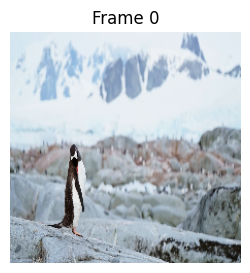


[FRAME 1] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[214 214 214 214 214 213 213 213]
 [214 214 214 214 214 214 214 214]
 [212 213 214 214 214 214 214 214]
 [212 214 213 214 214 214 214 213]
 [212 213 214 214 214 214 214 213]
 [212 214 214 214 214 214 214 214]
 [212 214 214 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]]


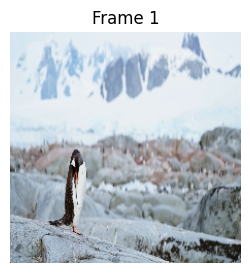


[FRAME 2] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[213 214 214 214 214 214 214 213]
 [213 214 214 214 214 214 214 213]
 [213 214 214 214 214 214 214 214]
 [212 213 214 214 214 214 214 212]
 [212 213 214 214 214 214 214 212]
 [212 212 214 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 212 212 214 214 214 214]]


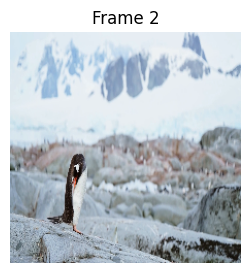


[FRAME 3] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 213 214 214 214 214]]


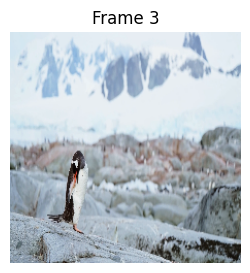


[FRAME 4] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 213 214 214 214 214 214]
 [212 212 213 214 214 214 214 214]
 [212 212 212 213 214 214 214 214]
 [212 212 213 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 213 214 214 214 214]
 [212 212 212 214 214 214 214 214]]


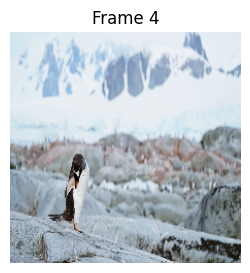


[FRAME 5] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[214 214 214 214 214 214 214 214]
 [214 214 214 214 214 214 214 214]
 [214 214 213 214 214 214 213 214]
 [214 213 213 214 214 214 214 212]
 [214 213 213 214 214 214 214 212]
 [214 214 213 213 214 214 214 212]
 [214 214 214 213 214 214 214 211]
 [212 214 213 214 214 214 214 212]]


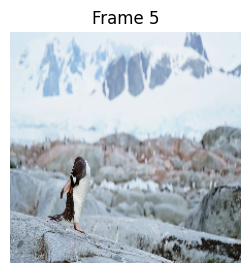


[FRAME 6] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[214 214 214 214 214 214 214 212]
 [214 214 214 214 214 214 214 212]
 [214 213 213 214 214 214 214 214]
 [214 213 214 214 214 214 214 213]
 [214 213 214 214 214 214 214 213]
 [214 214 214 214 214 214 214 212]
 [214 214 214 214 214 214 214 212]
 [213 214 213 214 214 214 214 214]]


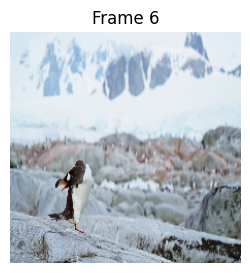


[FRAME 7] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 214 214 214 214 214 214 214]
 [212 214 214 214 214 214 214 214]
 [212 214 214 214 214 214 214 214]
 [212 214 213 214 214 214 214 214]
 [212 212 213 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]]


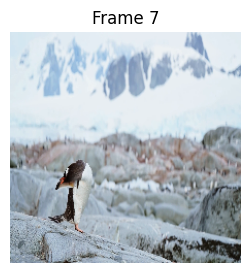


[FRAME 8] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 213 214 214 214 214 214 213]
 [212 213 214 214 214 214 214 214]
 [212 213 214 214 214 214 214 212]
 [212 213 214 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 213 214 214 214 214 214]]


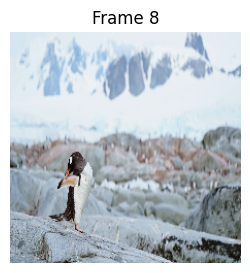


[FRAME 9] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 212 214 214 214 214]
 [212 212 212 212 214 214 214 214]
 [212 212 212 212 214 214 214 214]
 [212 212 212 212 213 214 214 214]
 [212 212 212 212 213 214 214 214]
 [212 212 212 212 212 214 214 214]]


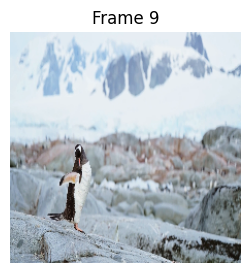


[FRAME 10] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 212 214 214 214 213]
 [212 212 212 212 213 214 214 213]
 [212 212 212 212 212 214 214 214]
 [210 212 212 212 212 214 214 214]
 [210 212 212 212 212 214 214 214]
 [212 212 212 212 212 214 214 213]
 [212 212 212 212 212 212 213 212]
 [210 212 212 212 212 212 212 213]]


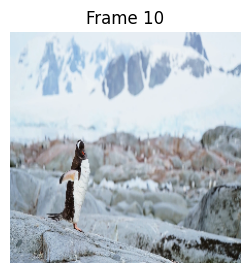


[FRAME 11] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 212 212 212 214 213]
 [212 212 212 212 212 212 214 213]
 [212 212 212 212 212 212 214 214]
 [212 212 212 212 212 212 214 214]
 [212 212 212 212 212 212 214 214]
 [212 210 212 212 212 212 214 214]
 [212 210 212 212 212 212 214 214]
 [210 210 212 212 212 212 212 214]]


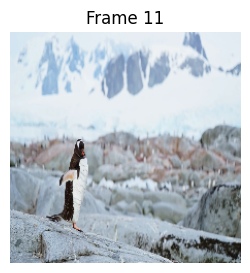


[FRAME 12] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 214 214 213 213 214 214]
 [212 212 214 214 213 213 214 214]
 [212 212 213 214 213 213 214 214]
 [212 212 213 214 214 213 214 214]
 [212 212 212 214 214 213 214 214]
 [212 212 212 212 214 213 214 214]
 [212 212 212 212 213 213 214 214]
 [212 212 212 212 214 213 213 214]]


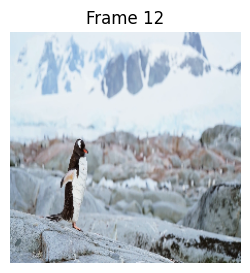


[FRAME 13] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[214 214 214 213 214 214 214 213]
 [214 214 214 213 214 214 214 214]
 [214 214 214 213 214 214 214 212]
 [213 214 213 214 214 214 214 212]
 [212 214 214 214 214 214 214 212]
 [212 214 214 213 214 214 214 214]
 [212 213 214 213 214 214 214 214]
 [212 213 214 214 214 214 214 214]]


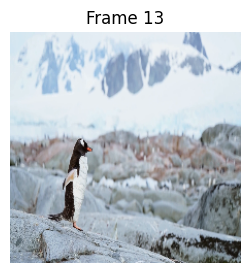


[FRAME 14] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 214 214 214 214 214 214 214]
 [212 214 214 214 214 214 214 214]
 [212 213 213 214 214 214 214 214]
 [212 212 213 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 214 214 214 214 214 214]
 [212 212 213 213 213 213 214 214]
 [212 212 212 213 214 214 214 214]]


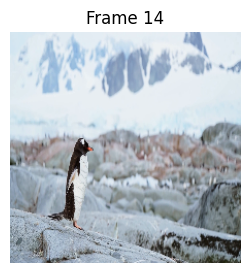


[FRAME 15] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 213 214 214 214 214]
 [212 212 212 212 214 214 214 214]
 [212 212 212 212 214 214 214 214]
 [210 212 212 212 213 214 214 214]
 [210 212 212 212 213 214 214 214]
 [210 212 212 212 213 214 214 214]]


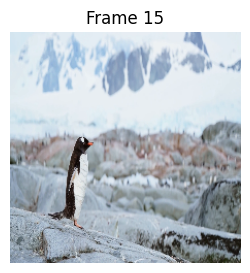


[FRAME 16] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 214 214 214 214 214]
 [212 212 212 214 214 214 214 214]
 [212 212 212 212 214 214 214 214]
 [212 212 212 212 212 214 214 214]
 [212 212 212 212 212 214 214 214]
 [210 212 212 212 212 213 214 214]
 [210 212 212 212 212 213 213 214]
 [212 212 212 212 212 213 214 214]]


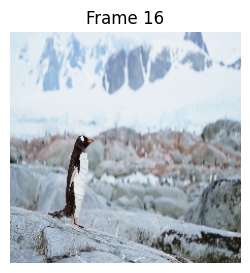


[FRAME 17] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 212 214 214 214 214]
 [212 212 212 212 214 214 214 214]
 [212 212 212 212 212 214 214 214]
 [210 212 212 212 212 214 214 214]
 [210 212 212 212 212 214 214 214]
 [212 212 212 212 212 213 212 214]
 [212 212 212 212 212 213 212 213]
 [210 210 212 212 212 212 214 213]]


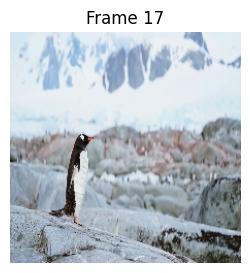


[FRAME 18] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 212 212 213 214 214]
 [212 212 212 212 212 213 214 214]
 [212 212 212 212 212 214 214 214]
 [212 212 212 212 212 213 214 214]
 [212 212 212 212 212 213 213 214]
 [210 210 210 210 212 213 213 214]
 [210 210 210 210 212 213 212 214]
 [210 210 210 210 212 213 213 213]]


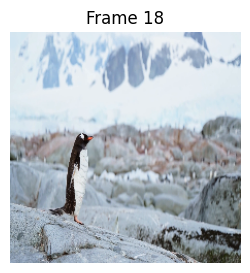


[FRAME 19] Shape: (224, 224, 3)
Top-Left 8x8 Pixel Matrix (Red Channel):
[[212 212 212 212 212 212 212 214]
 [212 212 212 212 212 212 212 214]
 [210 210 212 212 212 212 212 214]
 [210 210 210 210 212 212 211 213]
 [210 210 210 210 212 212 212 213]
 [210 210 210 210 212 212 211 212]
 [210 210 210 210 212 212 211 212]
 [210 210 210 210 210 210 210 212]]


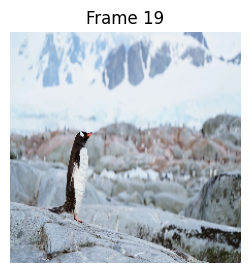

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Final Predictions ---
ptarmigan: 10.380000114440918%
black_grouse: 9.760000228881836%
weasel: 5.960000038146973%
ski: 3.890000104904175%
stone_wall: 3.6500000953674316%

Final Prediction: ptarmigan


In [ ]:
# Replace with your video path
video_path = "/content/327101_small.mp4"
classify_video(video_path)

